In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

#### Reading the data from CSV File

In [2]:
emp_data = pd.read_csv("DS1_C6_S2_EmployeeAttrition_Data_Concept.csv")          
emp_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8


## Level 0 analysis: Understanding the data

#### Checking dimension of the data

In [3]:
emp_data.ndim             

2

#### Reading the top 5 rows

In [4]:
emp_data.head()           

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2


##### In all we have 27 features consisting of both the categorical as well as the numerical features. The target variable is the 'Attrition' of the employee which can be either a Yes or a No.

#### Reading the bottom 5 rows

In [5]:
emp_data.tail()            

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8
1469,34.0,No,Travel_Rarely,Research & Development,8,Medical,2068,2,Male,82,...,No,3,1,6,3,4,4,3,1,2


#### Returns array of columns in dataset

In [3]:
emp_data.columns          

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### checking null values 

In [4]:
emp_data.isnull().sum()   

Age                         24
Attrition                    0
BusinessTravel              30
Department                   4
DistanceFromHome             0
EducationField              12
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                      45
HourlyRate                   0
JobInvolvement               0
JobRole                     10
JobSatisfaction              0
MaritalStatus               56
MonthlyIncome                0
NumCompaniesWorked           0
Over18                      54
OverTime                     0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

## Level 1 Analysis (Univariate Analysis)

In [8]:
def seprate_data_types(emp_data):                  # This function is for checking type of a data present in csv file. 
    categorical = []
    continuous = []
    for column in emp_data.columns:                # looping on the number of columns
        if emp_data[column].nunique() < 100:       # nunique:  returns unique values in the column,
                                                   # here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(emp_data)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Contiuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  --------------
Age                       EmployeeNumber
Attrition                 MonthlyIncome
BusinessTravel
Department
DistanceFromHome
EducationField
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


#### Missing Values Treatment 

In [17]:
age = emp_data["Age"].mean()
Business_Travel = emp_data["BusinessTravel"].mode()[0]
Department = emp_data["Department"].mode()[0]
Education_Field = emp_data["EducationField"].mode()[0]
gender = emp_data["Gender"].mode()[0]
Job_Role = emp_data["JobRole"].mode()[0]
Marital_Status = emp_data["MaritalStatus"].mode()[0]
Over18 = emp_data["Over18"].mode()[0]

In [18]:
emp_data['Age']=emp_data['Age'].fillna(age)
emp_data['BusinessTravel']=emp_data['BusinessTravel'].fillna(Business_Travel)
emp_data['Department']=emp_data['Department'].fillna(Department)
emp_data['EducationField']=emp_data['EducationField'].fillna(Education_Field)
emp_data['Gender']=emp_data['Gender'].fillna(gender)
emp_data['JobRole']=emp_data['JobRole'].fillna(Job_Role)
emp_data['MaritalStatus']=emp_data['MaritalStatus'].fillna(Marital_Status)
emp_data['Over18']=emp_data['Over18'].fillna(Over18)

In [19]:
emp_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#### This function will check for the following
    1. Unique values
    2. Mode
    3. Total count of missing values

In [1]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {emp_data[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {emp_data[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {emp_data[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe

#### 1. Analysis of Attrition column 

In [13]:
info_of_cat("Attrition")

Unique values in Attrition are: ['Yes' 'No']
Mode of Attrition is No
Number of missing values in Attrition is 0


In [14]:
No_of_emp = emp_data.groupby(["Attrition"])["Attrition"].count()
No_of_emp

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

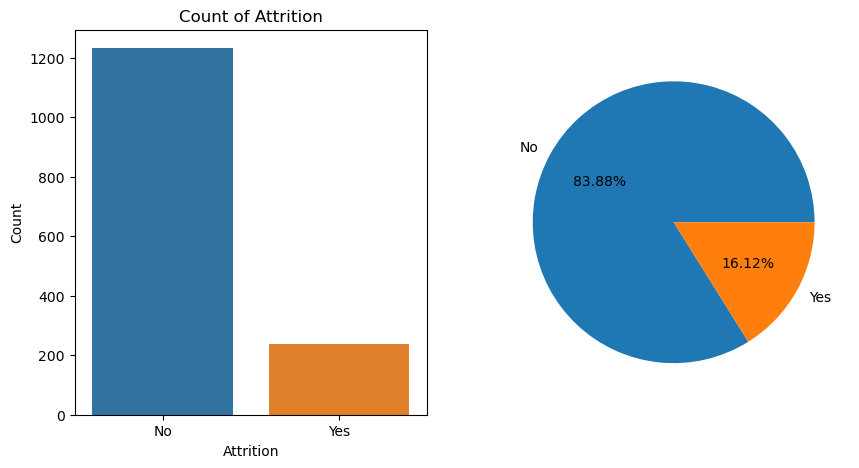

In [15]:
No_of_emp = emp_data.groupby(["Attrition"])["Attrition"].count()

Attrition_no = No_of_emp.index
Attrition_yes = No_of_emp.values

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.title("Count of Attrition")
plt.ylabel("Count")
sns.barplot(Attrition_no, Attrition_yes)

plt.subplot(1,2,2)
plt.pie(No_of_emp, labels= No_of_emp.index,  autopct = '%0.2f%%' );

##### Interpretation: The dataset indicates that 16.12% of the employees left the organization while 83.88% of the employees are still with it.

#### 2. Analysis of department column

#### ***This alaysis contain all employess data included who left the organization.

In [41]:
info_of_cat("Department")

Unique values in Department are: ['Sales' 'Research & Development' 'Human Resources']
Mode of Department is Research & Development
Number of missing values in Department is 0


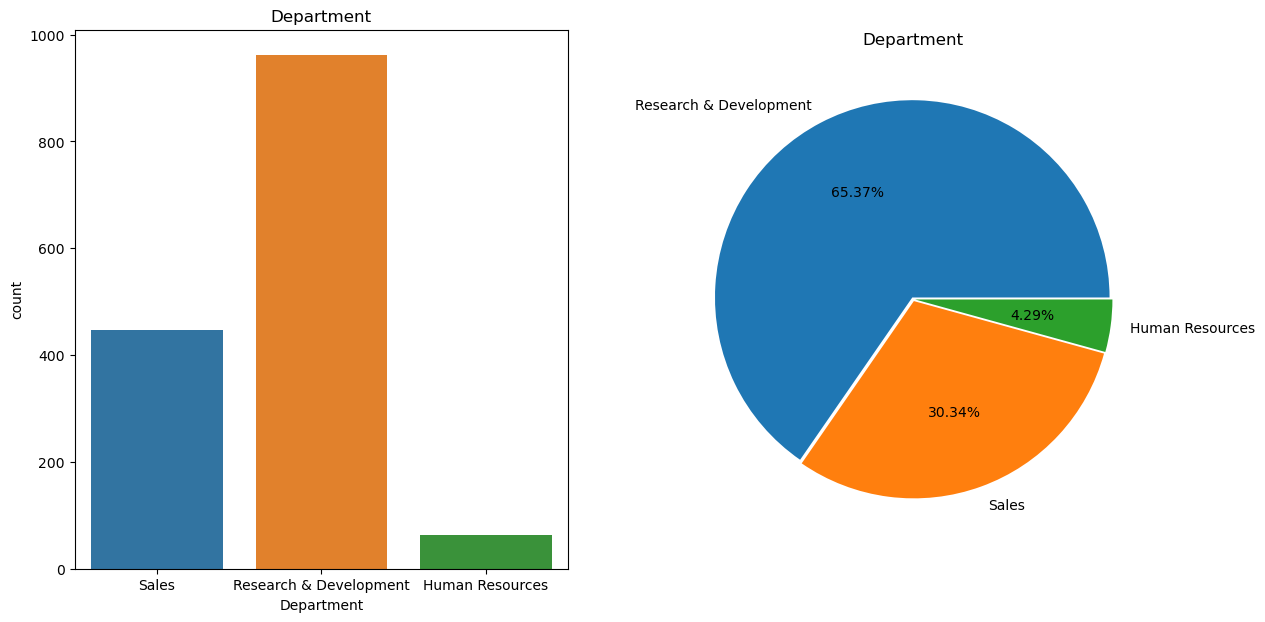

In [63]:
fig, ax = plt.subplots(1, 2, figsize = (14, 7))
ax[0].set_title("Department")                  
percentage = emp_data["Department"].value_counts()        
labels = list(emp_data["Department"].value_counts().index) 

sns.countplot(x = emp_data["Department"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", explode = [0.01,0.01,0.01]) 
plt.title("Department")

plt.show()

##### Interpretation: The dataset indicates that research & development department has more employee contribute to 65.37%

#### 3. Analysis of Educational Field column

In [43]:
info_of_cat("EducationField")

Unique values in EducationField are: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Mode of EducationField is Life Sciences
Number of missing values in EducationField is 0


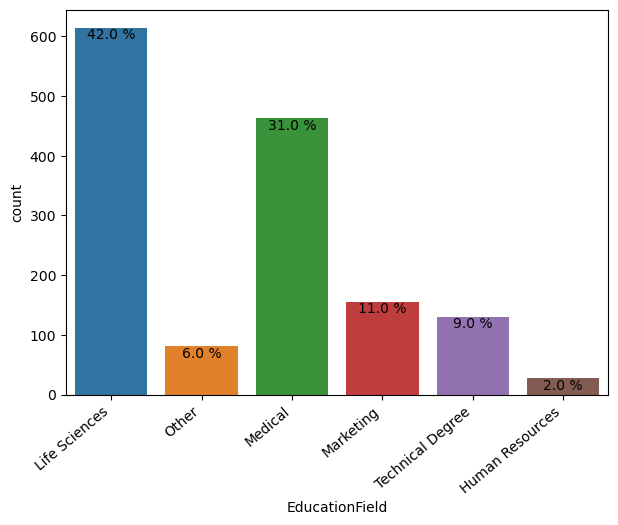

In [9]:
fig, ax = plt.subplots(figsize= (7, 5))
ax = sns.countplot(x = emp_data["EducationField"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40 , ha = "right")
count = len(emp_data["EducationField"])                                     
for bar in ax.patches:                                                 
    percentage = f"{round(bar.get_height()/count, 2)*100} %"           
                                                                            
    x = bar.get_x() + bar.get_width() /2                                
    y = bar.get_height()                                                
    ax.annotate(percentage, (x, y), ha = "center", va = "top")          
                                                                        
plt.show()

##### Interpretation: The dataset indicates that most of the employees belongs to life science field. which adds up to 42% of the total employees.

#### 4. Analysis of Gender column: Gender of a person (Male or Female)

In [44]:
info_of_cat("Gender")

Unique values in Gender are: ['Female' 'Male']
Mode of Gender is Male
Number of missing values in Gender is 0


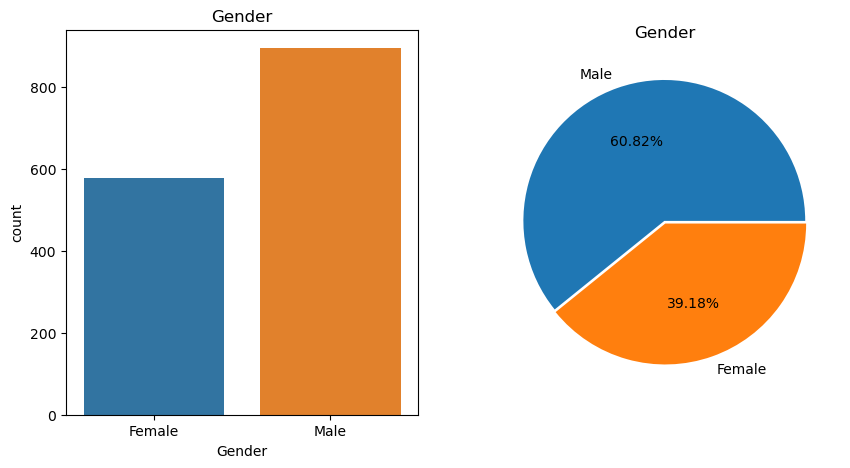

In [65]:
fig, ax = plt.subplots(1,2 ,figsize =(10,5))
ax[0].set_title("Gender")

percentage = emp_data["Gender"].value_counts()
labels = list(emp_data["Gender"].value_counts().index)

sns.countplot(x =emp_data["Gender"], ax =ax[0])
plt.pie(x =percentage,labels = labels, autopct= "%0.2f%%", explode = [0.01,0.01])
plt.title("Gender")

plt.show()

##### Interpretation: Male employees are more in number, contributing to 60.82%

#### 5. Analysis of Age Column.

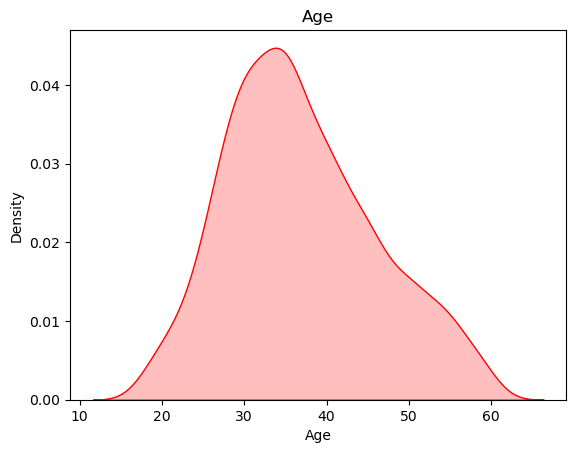

In [54]:
sns.kdeplot(emp_data['Age'],shade=True,color="Red")
plt.title("Age");

##### Interpretation: Maximum employee working in the company are from age group 25 to 40 

#### 6. Analysis of Marital Status Column

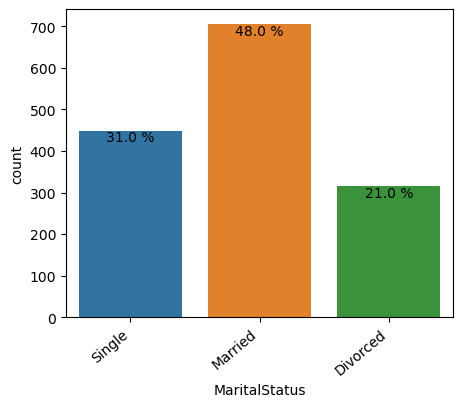

In [22]:
fig, ax = plt.subplots(figsize= (5, 4))
ax = sns.countplot(x = emp_data["MaritalStatus"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40 , ha = "right")
count = len(emp_data["MaritalStatus"])                                     
for bar in ax.patches:                                                 
    percentage = f"{round(bar.get_height()/count, 2)*100} %"           
                                                                            
    x = bar.get_x() + bar.get_width() /2                                
    y = bar.get_height()                                                
    ax.annotate(percentage, (x, y), ha = "center", va = "top")          
                                                                        
plt.show()

##### Interpretation:  Married employees are more in the company with 48.0% total contribution.

#### 7. Analysis of Total Working Year Column.

In [47]:
info_of_cat("TotalWorkingYears")

Unique values in TotalWorkingYears are: [ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 25 20 11 16 37 38 30 40 18 36 34 32 33 35 27]
Mode of TotalWorkingYears is 10
Number of missing values in TotalWorkingYears is 0


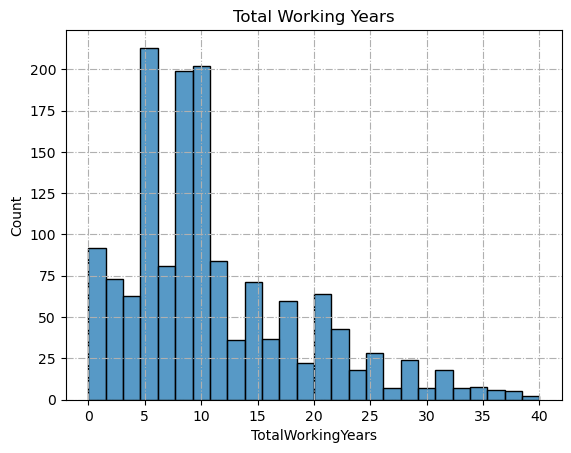

In [48]:
plt.title("Total Working Years")
sns.histplot(emp_data["TotalWorkingYears"])
plt.grid(linestyle='-.');

##### Interpretation: It is seen from above histrogram that company has more employees having experiance betwwen 5 to  10 Years.

#### 8. Analysis of Monthly Income Column. ( Continuous data)

In [49]:
info_of_cat("MonthlyIncome")

Unique values in MonthlyIncome are: [5993 5130 2090 ... 9991 5390 4404]
Mode of MonthlyIncome is 2342
Number of missing values in MonthlyIncome is 0


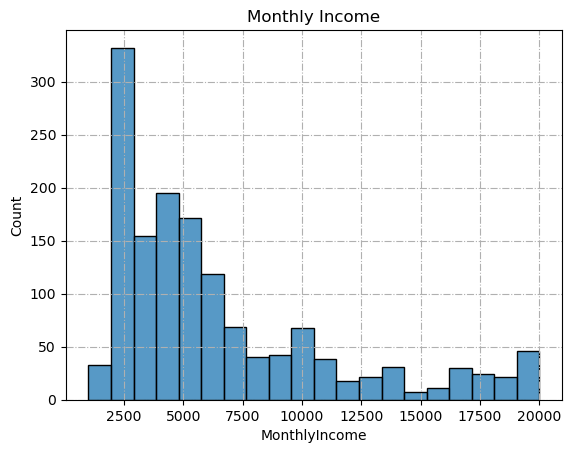

In [66]:
plt.title("Monthly Income")
sns.histplot(emp_data["MonthlyIncome"])
plt.grid(linestyle='-.');

##### Interpretation: Most of the employees have 2500 dollers monthly salary 

#### 9. Analysis of Business Travel  Column 

Travel_Rarely        71.700680
Travel_Frequently    18.231293
Non-Travel           10.068027
Name: BusinessTravel, dtype: float64


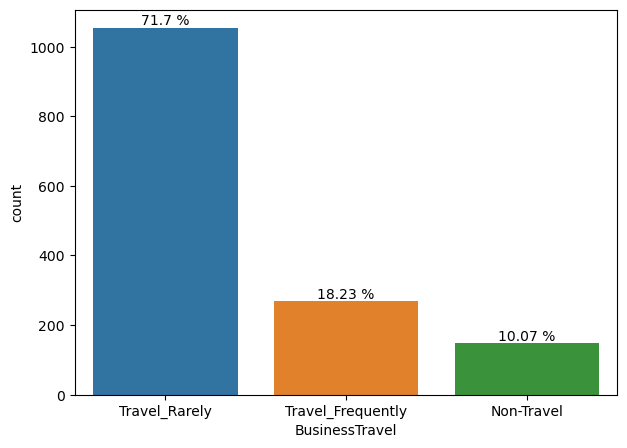

In [14]:
print((emp_data["BusinessTravel"].value_counts()/len(emp_data))*100)               
                                                                           
fig, ax = plt.subplots(figsize = (7, 5))
sns.countplot(x = emp_data[ 'BusinessTravel'], ax = ax)
for bar in ax.patches:                                                  # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /emp_data.shape[0])*100 , 2)} %"  # first it calculate the bar height and then dividing by the number of rows in data and 
                                                                            #multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" )       # annotate: used to annotate over objects. here objects are the bars.
plt.show()

##### Interpretation: In the company, most of the employee travel rarely or don't travel. That group compose the 71.7% of entire company. The rest of the company employees which is 18.23% of them must travel frequently. and 10.07 % non-travel.

## Level 2 Analysis (Bi-Variate Analysis)

#### 1. Relation between Attrition with Gender 

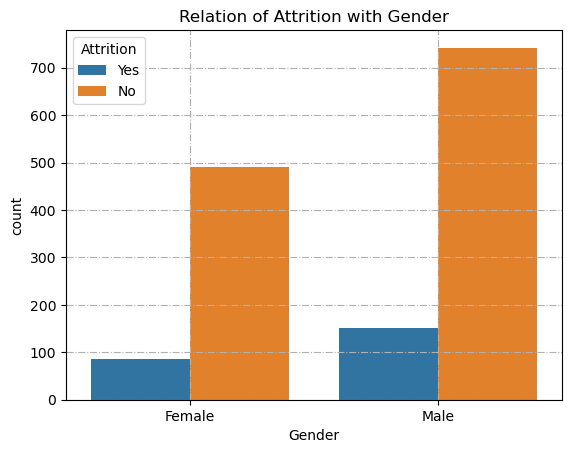

In [67]:
plt.title("Relation of Attrition with Gender")
sns.countplot(x = "Gender", hue = "Attrition", data = emp_data)
plt.grid(linestyle='-.')
plt.show()

##### Interpretation: Percentage of men left is more than women.

#### 2. Relation between Attrition with Marital Status 

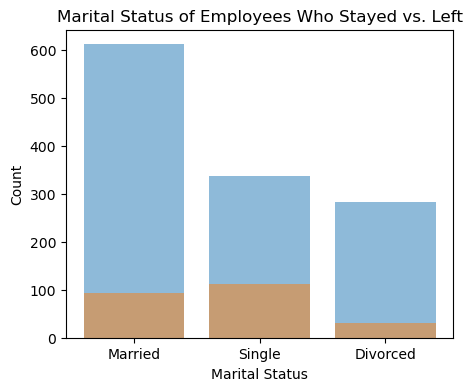

In [25]:
stayed = emp_data[emp_data['Attrition'] == "No"]
left = emp_data[emp_data['Attrition'] == "Yes"]

stayed_edu = stayed['MaritalStatus'].value_counts()
left_edu = left['MaritalStatus'].value_counts()

plt.figure(figsize=(5,4))
plt.bar(stayed_edu.index, stayed_edu.values, alpha=0.5, label='Stayed')
plt.bar(left_edu.index, left_edu.values, alpha=0.5, label='Left')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status of Employees Who Stayed vs. Left')
plt.show()

##### Interpretation: Single employees are more likely to leave the company. They have the highest attrition number and compose of the 50.6% employees who left the company. Married and Divorced employees are the followers of Single employees in the attrition number of the company respectively.

#### 3. Relation between Attrirtion and Department

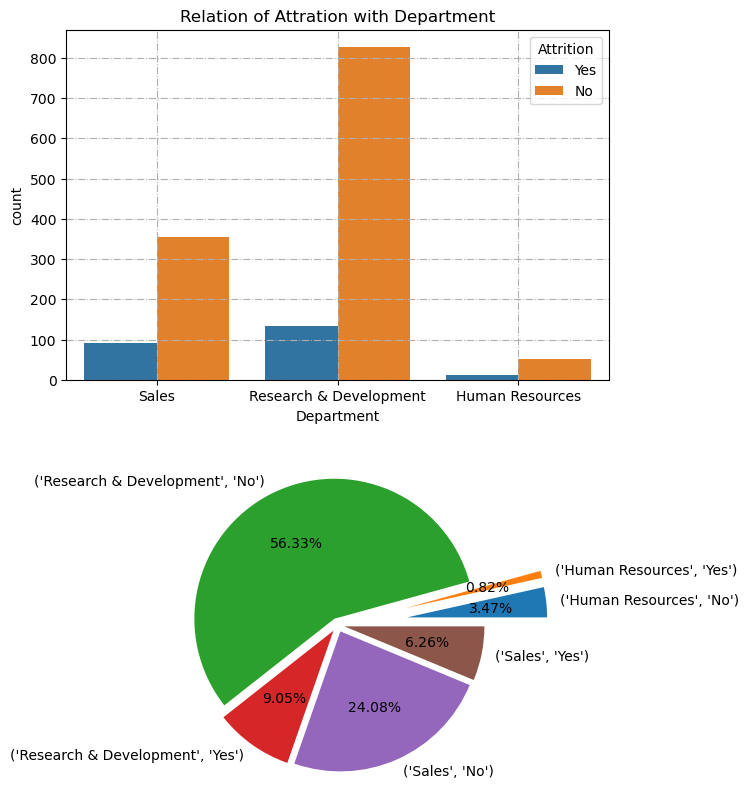

In [10]:
department_atrition_relation = emp_data.groupby(["Department","Attrition"])["Attrition"].count()
plt.figure(figsize=(7,10))
plt.subplot(2,1,1)
plt.title("Relation of Attration with Department")
sns.countplot(x = "Department", hue = "Attrition", data= emp_data)
plt.grid(linestyle='-.')

plt.subplot(2,1,2)
plt.pie(department_atrition_relation, labels= department_atrition_relation.index, autopct='%0.2f%%', explode = [0.5,0.5,0.05,0.05,0.05,0.05]);

##### Interpretation: Maximum employees left from organization is from Sales  department followed by Research & Development.

#### 4. Realation between Age and Attrition 

In [54]:
make_fill = emp_data['Age'].mode()[0]
emp_data['Age'] = emp_data['Age'].fillna(make_fill)

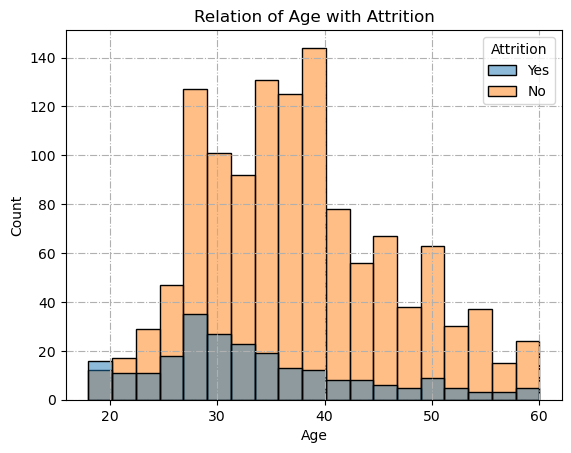

In [69]:
sns.histplot(x = emp_data["Age"], hue = emp_data["Attrition"])
plt.title("Relation of Age with Attrition")
plt.grid(linestyle='-.')

##### Interpretation: Major Attrition occured among the mid-career level employees ( Age between 25 to 35). Career change and career growth could be one of the possibilities for such an attrition levels. This shows that peole with higher age have lesser tendency to leave the organisation which makes sense as they may have settled in the organisation.

#### 5. Realation between Distance from home and Attrition 

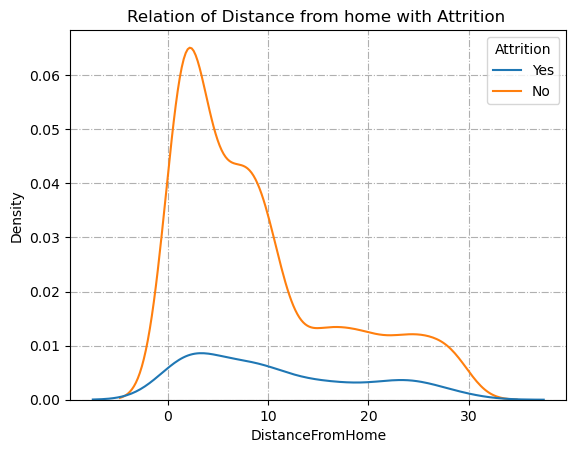

In [70]:
sns.kdeplot(x=emp_data["DistanceFromHome"], hue=emp_data["Attrition"], data=emp_data)
plt.title("Relation of Distance from home with Attrition ")
plt.grid(linestyle='-.');

##### Interpretation: There is a higher proportion of attrite employees who stay far from the office (More than 10 KM) than the proportion of employees who did not leave the company and stay far away from the office.

#### 6. Relation between Attrition and JobSatisfaction and Environment Satisfaction

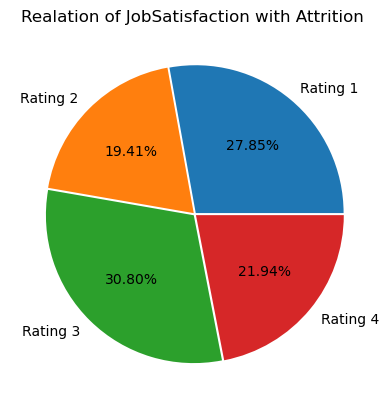

In [71]:
emp_data1 = emp_data[(emp_data.Attrition == "Yes")]
department_atrition_relation = emp_data1.groupby(["JobSatisfaction","Attrition"])["Attrition"].count()
plt.pie(department_atrition_relation, labels= ("Rating 1","Rating 2","Rating 3","Rating 4"), autopct='%0.2f%%', explode = (0.01, 0.01, 0.01, 0.01))
plt.title("Realation of JobSatisfaction with Attrition ");

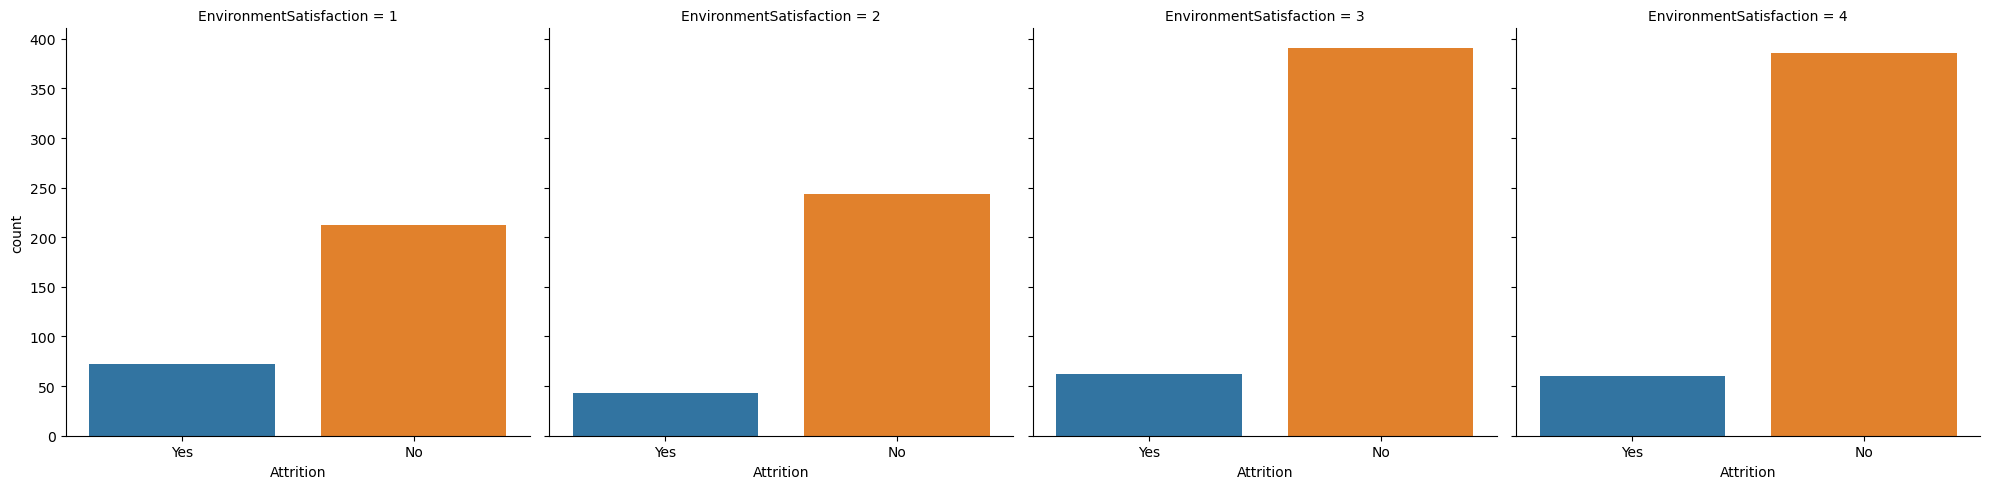

In [11]:
sns.factorplot(data=emp_data, kind='count', x='Attrition', col='EnvironmentSatisfaction');

##### interpretation: In satisfaction of rating 3, surprisingly employees leave the company most and their attrition composes 30.8% of company's attrition.  From this picture, we assume that job satisfaction should not be the main reason for employees to leave the company. As it may be expected, in job satisfaction of rating 1, employees leave the company more than other groups except satisfaction rating 3. They compose 27.85% of all attrition in the company.

#### 7. Realation between Monthly Income and Attrition

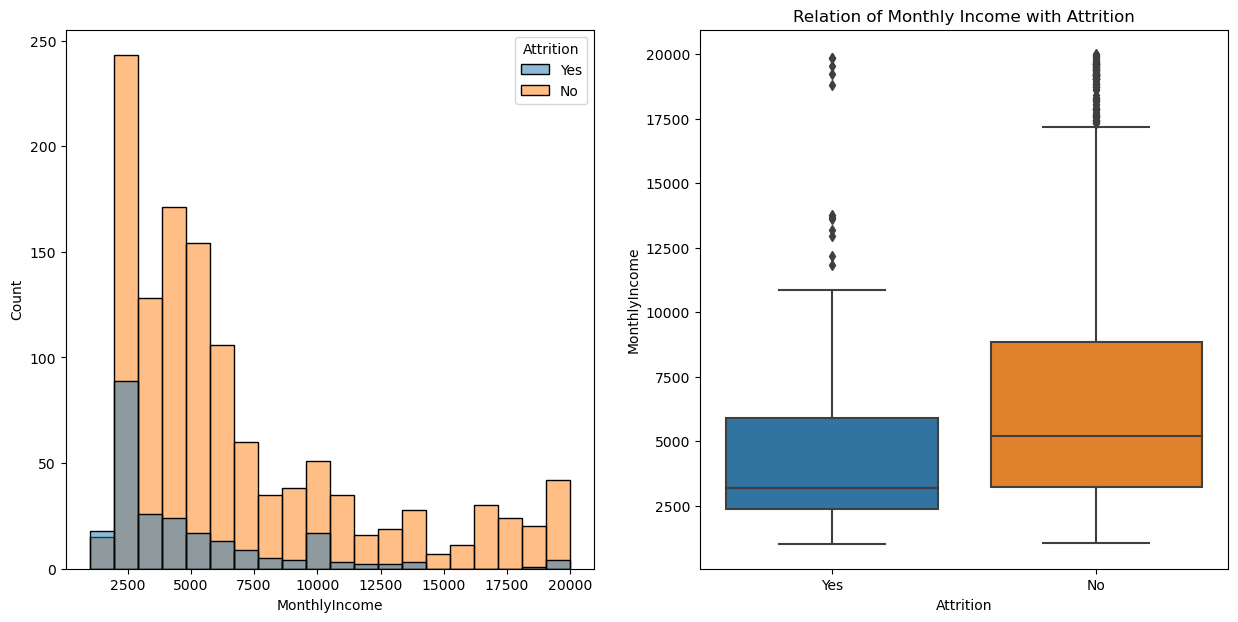

In [80]:
fig, ax = plt.subplots(1, 2,  figsize = (15, 7))

sns.histplot(x = emp_data["MonthlyIncome"], hue = emp_data["Attrition"], ax = ax[0])
plt.title("Relation of Monthly Income with Attrition")

sns.boxplot(x = emp_data["Attrition"] ,y = emp_data["MonthlyIncome"] , ax = ax[1])
plt.show()

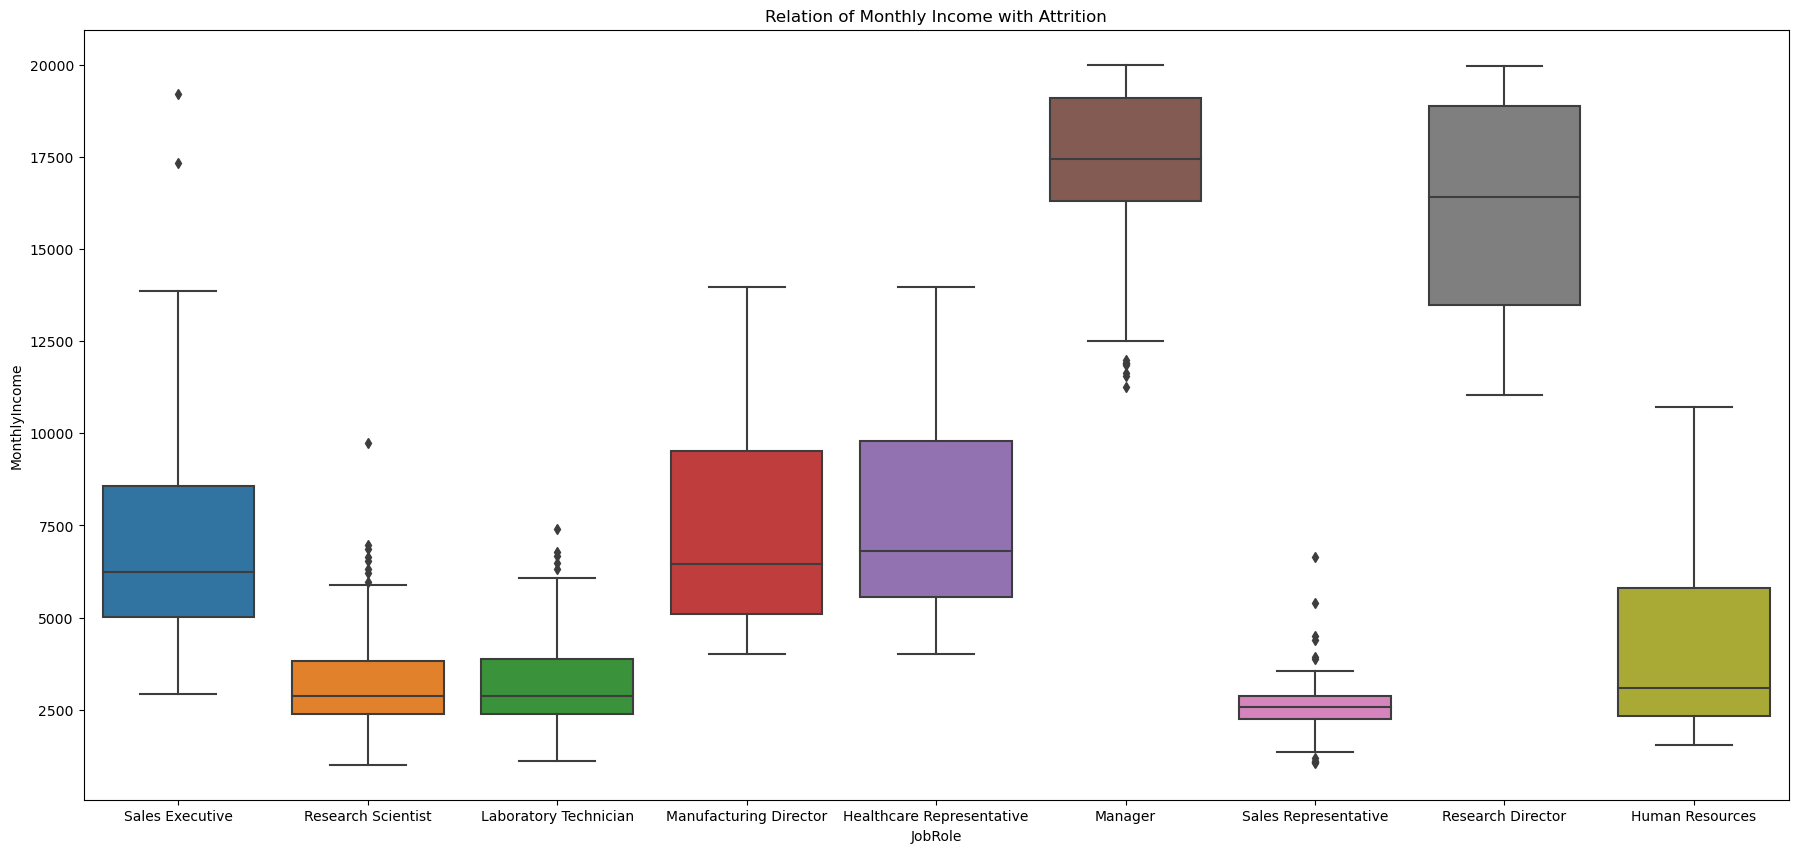

In [75]:
plt.figure(figsize=(22,10))
sns.boxplot(x= emp_data["JobRole"], y= emp_data["MonthlyIncome"])
plt.title("Relation of Monthly Income with Attrition")
plt.show()

##### Interpretation: a) The median salaries of Managers and Research Director has to be obviously on the higher side. 
##### b) The median salary of Sales Representatives, Laboratory Technicians and Human Resources Employees tends to be on the lower side. In the above attrition rate vs job role graph, these groups comparatively had the highest attrition among the other roles. This possibly leads to the fact that lower monthly rate could be a cause for higher attrition rates of these employee groups.

#### 8. Realation between Performance Rating and Attrition

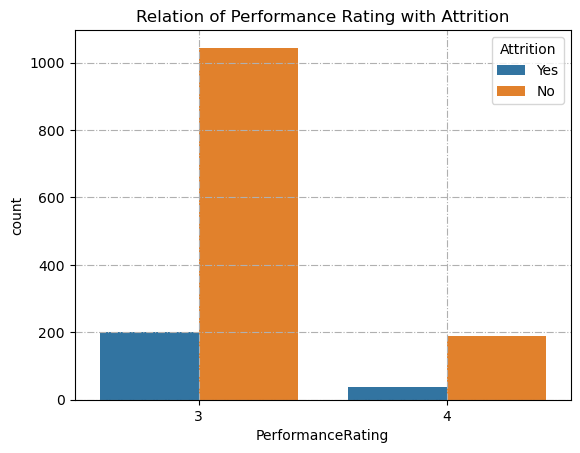

In [72]:
sns.countplot(x ="PerformanceRating", hue="Attrition", data=emp_data)
plt.title("Relation of Performance Rating with Attrition")
plt.grid(linestyle='-.');

##### interpretation: The employees have performance rating 3  to have a higher attrition rate.

#### 9. Realation between Business Travel and Attrition

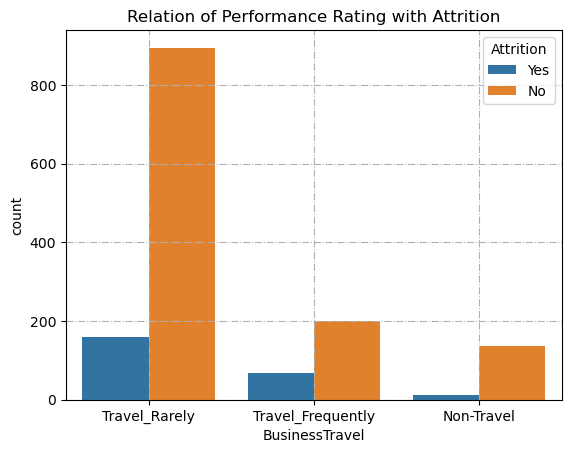

In [16]:
sns.countplot(x ="BusinessTravel", hue="Attrition", data=emp_data)
plt.title("Business Travel with Attrition")
plt.grid(linestyle='-.');

##### interpretation: The highest attrition number belongs to the employees who travels rarely. That is approximately 15% of employees in that group. But when you put this number overall attrition, it makes up 65.8% of all attrition in the company. If we look at the attrition percentage of relevant travel group, the employees who are traveling frequently are in the danger zone. Because they have the highest attrition proportion, which is 24.9%, in their individual travel group. That group's attrition rate composes of the 29.1% of overall attrition in the company . Employees who don't travel in their current role have the lowest attrition rate, which is  8%.

## Level 3 Analysis (Multivariate Analysis)

#### 1. Which age group of men has a larger Attrition.

In [91]:
males = emp_data[(emp_data["Gender"]=="Male") & (emp_data["Attrition"]=="Yes")] 
bins = [0,30, 40, 50, 60]                                             
labels =  ["Young", "Adult", "Senior", "Super-Seinor"]                   
data = pd.cut(males["Age"], bins = bins, labels = labels)

data = data.value_counts()                                                      
data

Young           61
Adult           57
Senior          21
Super-Seinor    13
Name: Age, dtype: int64

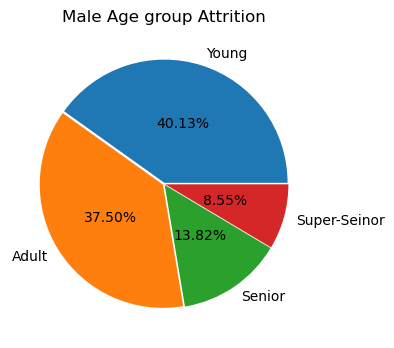

In [92]:
pie, ax = plt.subplots(figsize = [5,4])
plt.pie(x = data,autopct= '%0.2f%%', explode = [0.01, 0.01, 0.01, 0.01] ,labels =data.index, pctdistance = 0.5) 
                                                                                            
plt.title("Male Age group Attrition")
plt.show()

##### Interpretation: Adult and young group of men have higher attirition.

#### 2. Analyze the attrition rate of employees based on their education levels

In [152]:
data = emp_data[(emp_data["Attrition"]=="Yes")]
data = data["EducationField"] 
data = data.value_counts()
data

Life Sciences       88
Medical             63
Marketing           34
Technical Degree    30
Other               11
Human Resources      7
Name: EducationField, dtype: int64

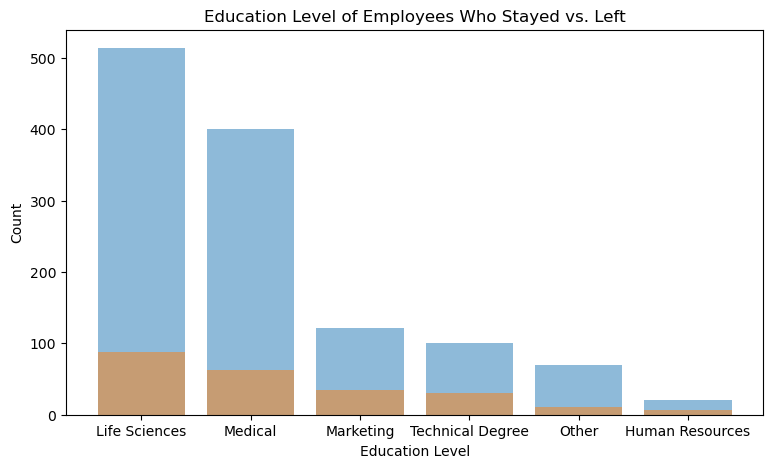

In [36]:
stayed = emp_data[emp_data['Attrition'] == "No"]
left = emp_data[emp_data['Attrition'] == "Yes"]

stayed_edu = stayed['EducationField'].value_counts()
left_edu = left['EducationField'].value_counts()

plt.figure(figsize=(9,5))
plt.bar(stayed_edu.index, stayed_edu.values, alpha=0.5, label='Stayed')
plt.bar(left_edu.index, left_edu.values, alpha=0.5, label='Left')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level of Employees Who Stayed vs. Left')
plt.show()

##### Interpretation: Based on the education level, attrition rate is higher in life-science and medical employees followed by marketing.

#### 3. Does average monthly income of employees who left the organization are different from employees still with organization  ? 

In [183]:
with_organization_sales = emp_data[(emp_data["Department"] == "Sales") & (emp_data["Attrition"] == "No")]
left_organization_sales = emp_data[(emp_data["Department"] == "Sales") & (emp_data["Attrition"] == "Yes")]
with_organization_mean_sales = with_organization_sales["MonthlyIncome"].mean()
left_organization_mean_sales = left_organization_sales["MonthlyIncome"].mean()

In [184]:
print(f"Employees who are with the organization their average monthly income is {round(with_organization_mean_sales, 3)}")
print(f"Employees who left the organization their average monthly income is {round(left_organization_mean_sales,3)}")

Employees who are with the organization their average monthly income is 7232.24
Employees who left the organization their average monthly income is 5908.457


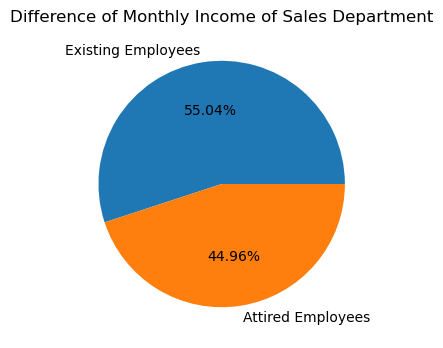

In [185]:
data = [7232.24, 5908.457]
fig, ax = plt.subplots(figsize = [5,4])
plt.pie(data, labels = ["Existing Employees", "Attired Employees"], autopct='%0.2f%%')
plt.title("Difference of Monthly Income of Sales Department")
plt.show()

In [186]:
with_organization_pd = emp_data[(emp_data["Department"] == "Research & Development") & (emp_data["Attrition"] == "No")]
left_organization_pd = emp_data[(emp_data["Department"] == "Research & Development") & (emp_data["Attrition"] == "Yes")]
with_organization_mean_pd = with_organization_pd["MonthlyIncome"].mean()
left_organization_mean_pd = left_organization_pd["MonthlyIncome"].mean()

In [187]:
print(f"Employees who are with the organization their average monthly income is {round(with_organization_mean_pd, 3)}")
print(f"Employees who left the organization their average monthly income is {round(left_organization_mean_pd,3)}")

Employees who are with the organization their average monthly income is 6638.54
Employees who left the organization their average monthly income is 4108.075


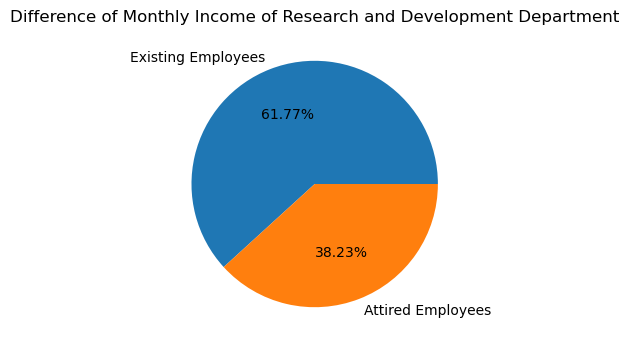

In [189]:
data = [6638.54, 4108.075 ]
fig, ax = plt.subplots(figsize = [5,4])
plt.pie(data, labels = ["Existing Employees", "Attired Employees"], autopct='%0.2f%%')
plt.title("Difference of Monthly Income of Research and Development Department")
plt.show()

In [190]:
with_organization_hr = emp_data[(emp_data["Department"] == "Human Resources") & (emp_data["Attrition"] == "No")]
left_organization_hr = emp_data[(emp_data["Department"] == "Human Resources") & (emp_data["Attrition"] == "Yes")]
with_organization_mean_hr = with_organization_hr["MonthlyIncome"].mean()
left_organization_mean_hr = left_organization_hr["MonthlyIncome"].mean()

In [191]:
print(f"Employees who are with the organization their average monthly income is {round(with_organization_mean_hr, 3)}")
print(f"Employees who left the organization their average monthly income is {round(left_organization_mean_hr,3)}")

Employees who are with the organization their average monthly income is 7345.98
Employees who left the organization their average monthly income is 3715.75


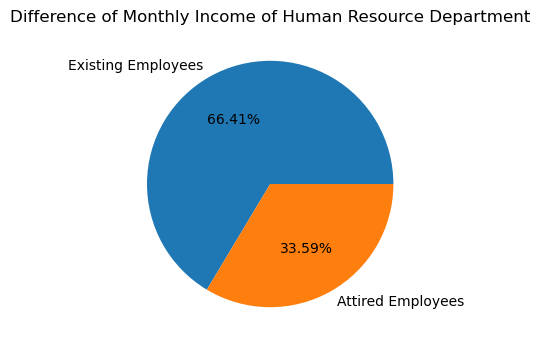

In [192]:
data = [7345.98, 3715.75 ]
fig, ax = plt.subplots(figsize = [5,4])
plt.pie(data, labels = ["Existing Employees", "Attired Employees"], autopct='%0.2f%%')
plt.title("Difference of Monthly Income of Human Resource Department")
plt.show()

#### Interpretation: Yes, the average salary of employees who are with the organization is higher than that of employees who leave the organization.

#### 4. How does the over time and promotion effect the attrition?

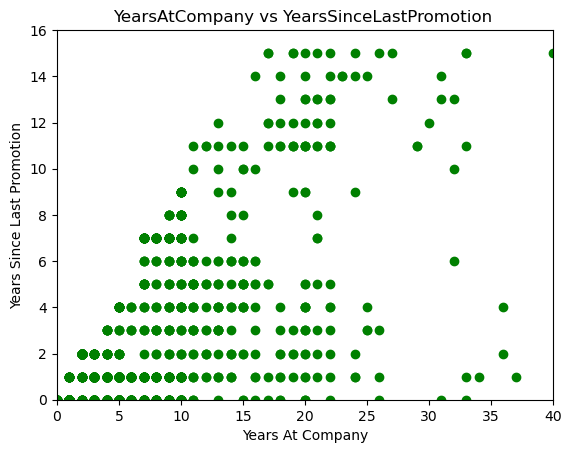

In [81]:
correlate1 = emp_data["YearsAtCompany"].corr(emp_data["YearsSinceLastPromotion"])
plt.scatter(emp_data["YearsAtCompany"],emp_data["YearsSinceLastPromotion"], color="green")
plt.title("YearsAtCompany vs YearsSinceLastPromotion ")
plt.xlim(0,40)
plt.ylim(0,16)
plt.xlabel("Years At Company")
plt.ylabel("Years Since Last Promotion");

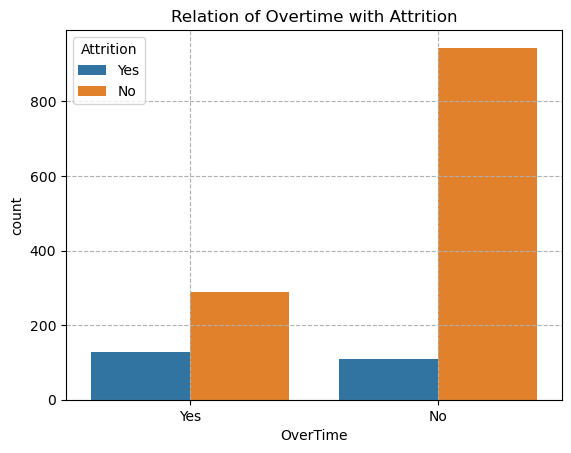

In [83]:
sns.countplot(x ="OverTime", hue = "Attrition", data = emp_data)
plt.title("Relation of Overtime with Attrition")
plt.grid(linestyle="--");

###### Interpretation: The Promotion graph opens up an interesting perspective, as a lot of it getting spaced out towards the right hand side, indicating a positive correlation between these two variables may mean that people are not really growing within the company. Here we note two things. Firstly, there is a relatively higher percentage of people working overtime in the group of those who left, secondly, while things seem to be going in the right direction for the group of people who continue with firm, the opposite is happening in the other group. It seems that there may be a pattern of people leaving because they are not promoted although they work hard. 

#### 5. Does Manager plays any role in attrition rate 

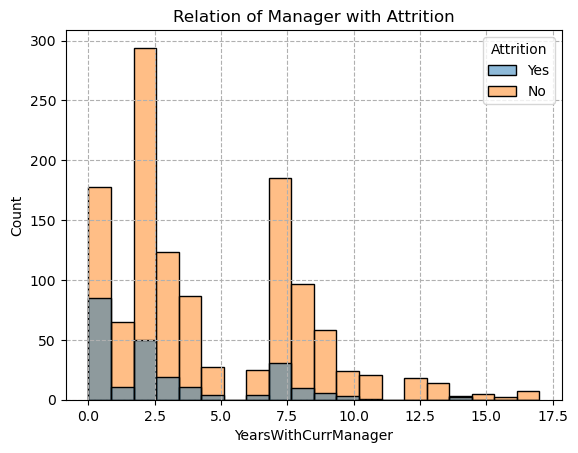

In [93]:
sns.histplot(x ="YearsWithCurrManager", hue = "Attrition", data = emp_data)
plt.title("Relation of Manager with Attrition")
plt.grid(linestyle="--");

##### Interpretation: Most of the employee quit the company before completing their first year with their current manager. Other group who leaves the company most is the ones who work two years with current manager.

### Conclusion 
##### 1. Males at higher attrition risk comparatively than females. 
##### 2. Sales department has higher attrition rate.
##### 3. Low monthly income is one of the cause for attrition.
##### 4. Long distance between employees home and company location.
##### 5. The highest attrition number belongs to the employees who travels rarely.
##### 6. Single marital status geoup have higher attrition rate. 
##### 7. Attrition is witnessed for all levels of Job Satisfaction.
##### 8. Promotion is the one factor that affect the attrition. employees need apreciation for their work or else they leave the job.